In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
df.shape

(768, 9)

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# DecisionTreeClassifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')

In [12]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
from sklearn import tree

In [15]:
accuracy_score(y_test,y_pred)

0.7662337662337663

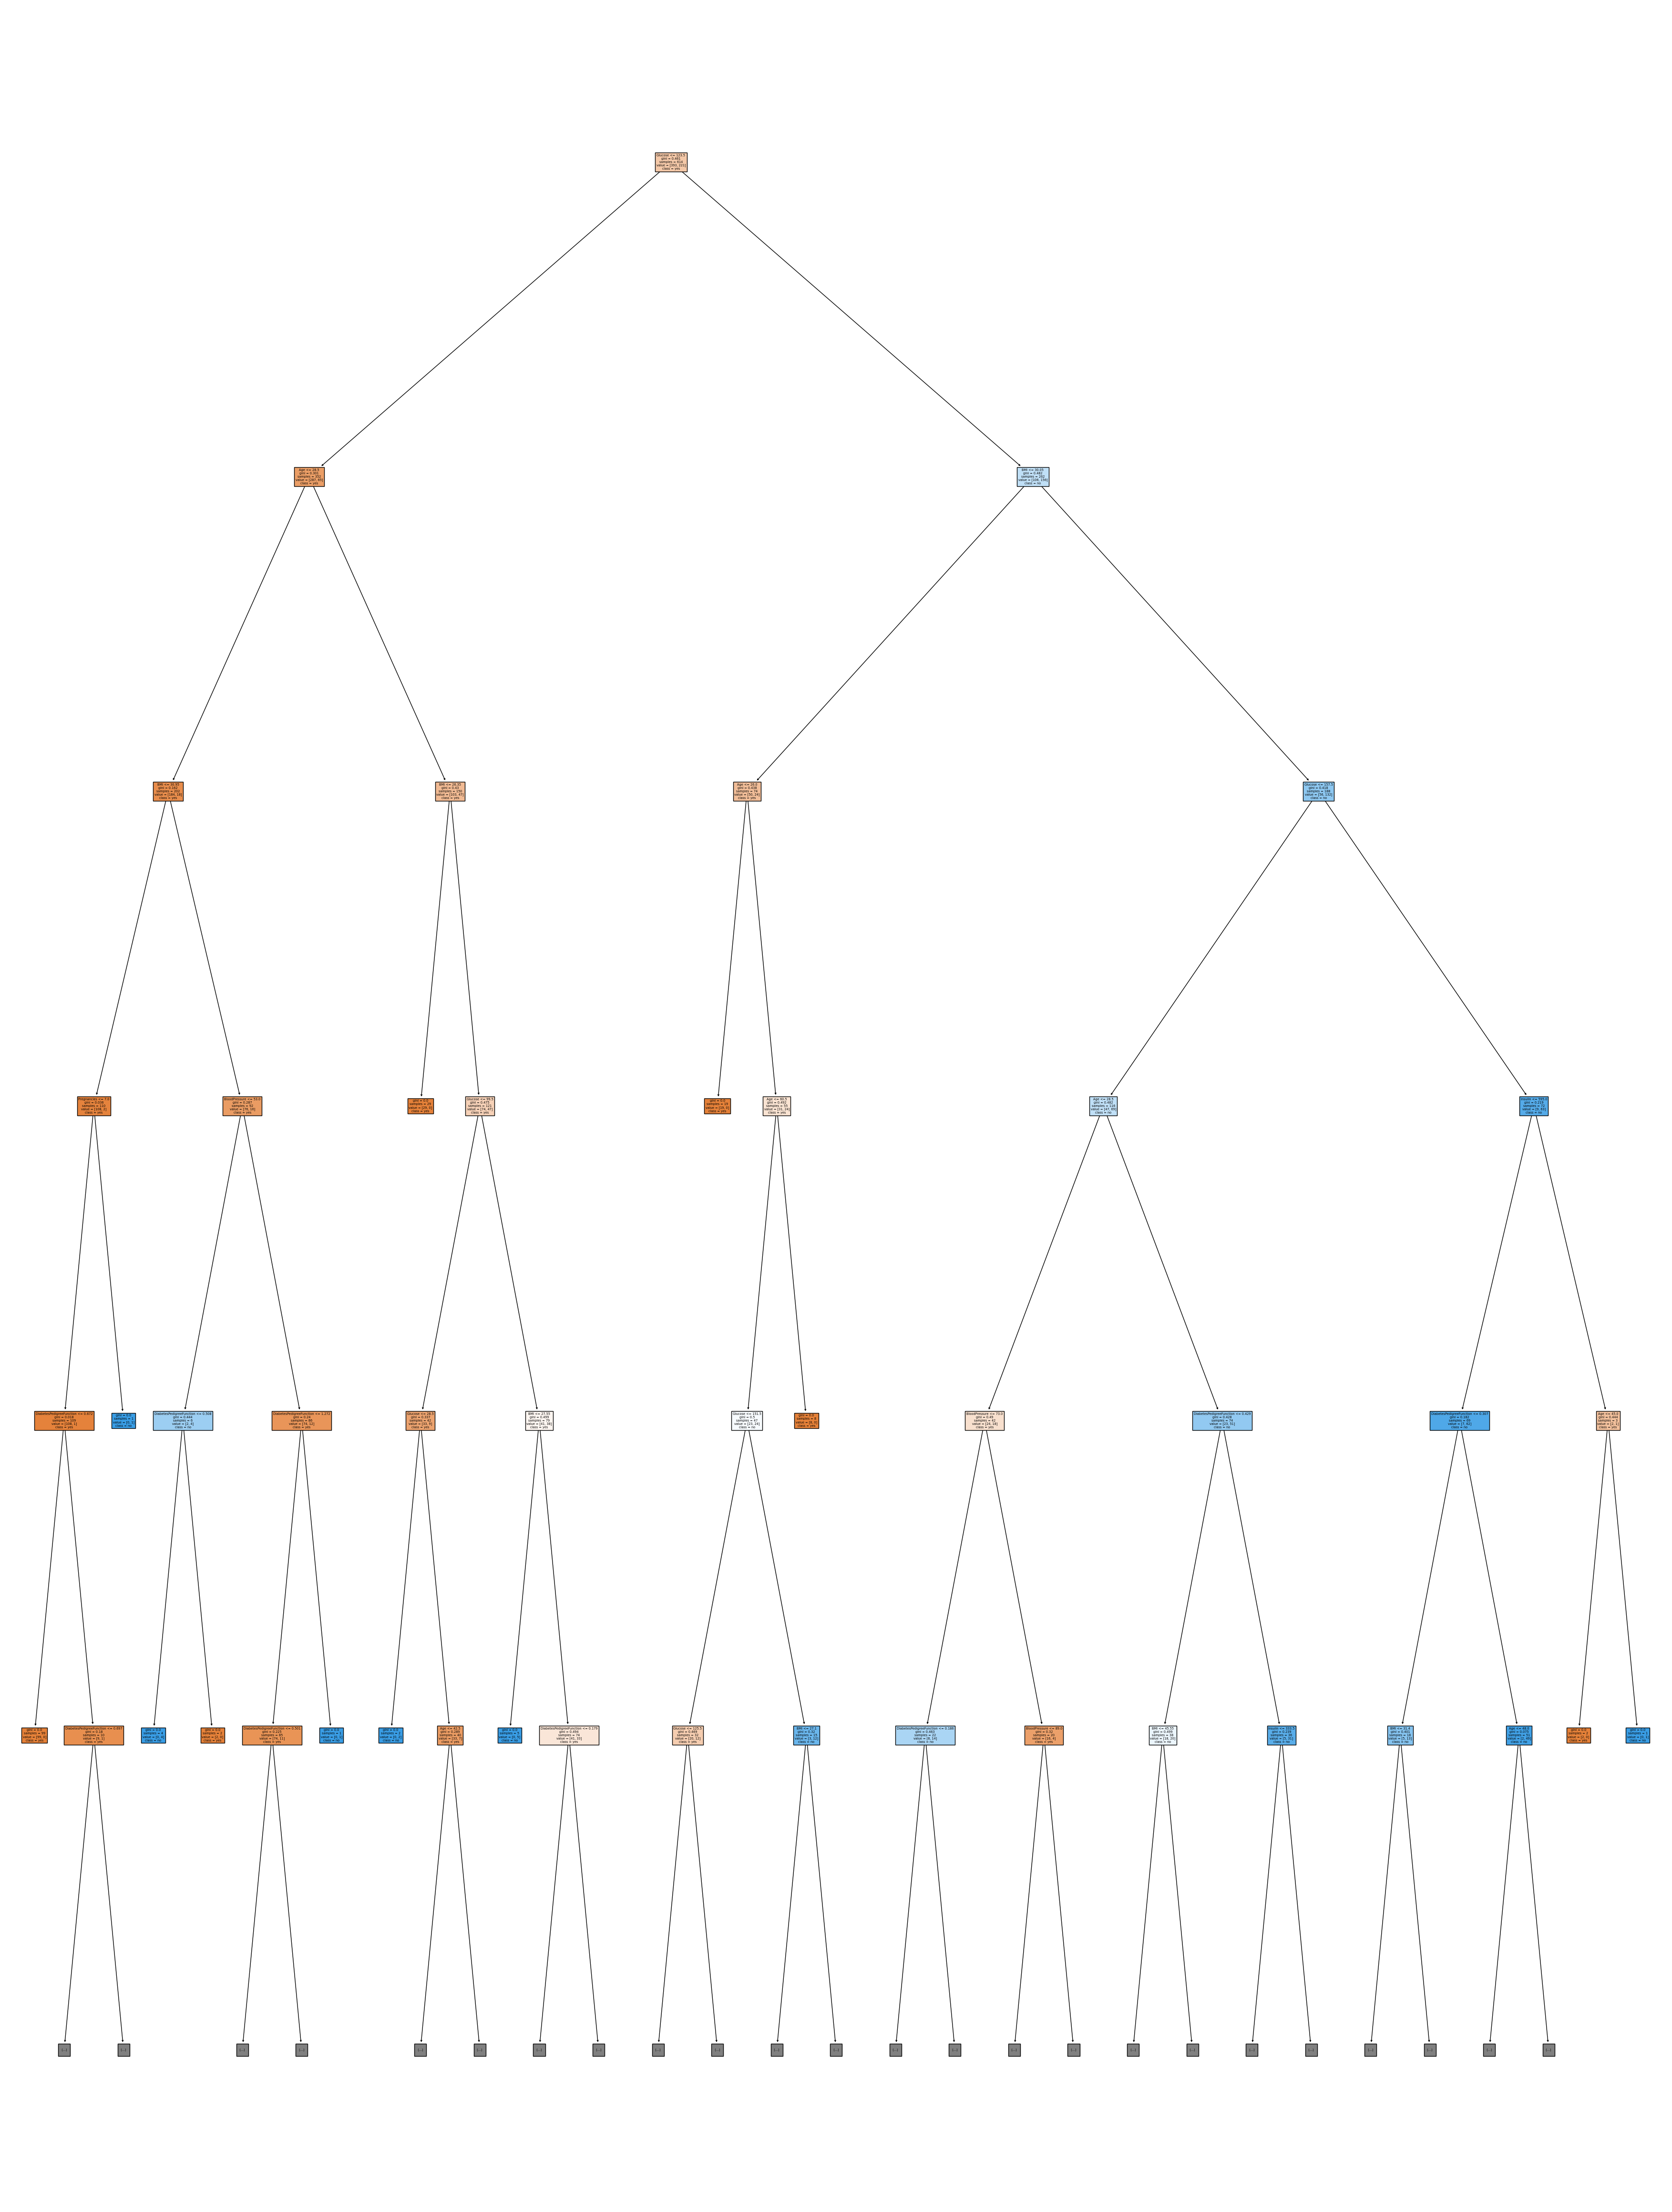

In [16]:
plt.figure(figsize=(45,60))
_= tree.plot_tree(model,max_depth=5,feature_names=df.columns[:-1],class_names=['yes','no'],filled=True)

# grid search cv

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid ={
    'criterion' : ['gini','entropy'],
    'max_depth' : [2,3,4,5,6,7],
    'max_features' : [4,5,6,7,8]
}

In [19]:
model = DecisionTreeClassifier()

In [20]:
gridsearch=GridSearchCV(estimator=model,param_grid=param_grid,cv=10)

In [21]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': [4, 5, 6, 7, 8]})

In [22]:
gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'max_features': 6}

In [23]:
gridsearch.best_score_

0.7441829719725014

In [24]:
best_model=gridsearch.best_estimator_

In [25]:
best_model.fit(X_test,y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=6)

In [26]:
best_model.score(X_test,y_test)

0.7922077922077922

# RandomizedSearchCV

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [28]:
param ={
    'criterion' : ['gini','entropy'],
    'max_depth' : (2,8),
    'max_features' : (2,8)
}

In [29]:
model = DecisionTreeClassifier()

In [30]:
randomsearch = RandomizedSearchCV(estimator=model,param_distributions=param,cv=20,n_iter=30)

In [31]:
randomsearch.fit(X_train,y_train)

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 8 is smaller than n_iter=30. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=20, estimator=DecisionTreeClassifier(), n_iter=30,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': (2, 8),
                                        'max_features': (2, 8)})

In [32]:
randomsearch.best_estimator_

DecisionTreeClassifier(max_depth=2, max_features=8)

In [33]:
randomsearch.best_score_

0.7343548387096774